In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('./Cyber Security Breaches.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        1055 non-null   int64 
 1   Number                            1055 non-null   int64 
 2   Name_of_Covered_Entity            1055 non-null   object
 3   State                             1055 non-null   object
 4   Business_Associate_Involved       271 non-null    object
 5   Individuals_Affected              1055 non-null   int64 
 6   Date_of_Breach                    1055 non-null   object
 7   Type_of_Breach                    1055 non-null   object
 8   Location_of_Breached_Information  1055 non-null   object
 9   Date_Posted_or_Updated            1055 non-null   object
 10  Summary                           142 non-null    object
 11  breach_start                      1055 non-null   object
 12  breach_end          

In [8]:
df.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


In [13]:
df = df[['Location_of_Breached_Information', 'Summary']]
df = df[pd.notnull(df['Summary'])]
df.head()

df['Type_of_Breach']=df['Location_of_Breached_Information'].factorize()[0]
df.head()

X_train, X_test, y_train, y_test = train_test_split(df['Summary'], df['Location_of_Breached_Information'])


lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


In [16]:
tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf.fit(df['Summary'])
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = RandomForestClassifier()

clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print(accuracy_score(y_test, y_pred))

0.1111111111111111


In [17]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test , y_pred =y_pred)

print(confmat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.06      0.50      0.11         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0

    accuracy                           0.11        36
   macro avg       0.08      0.12      0.09        36
weighted avg       0.09      0.11      0.09        36

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

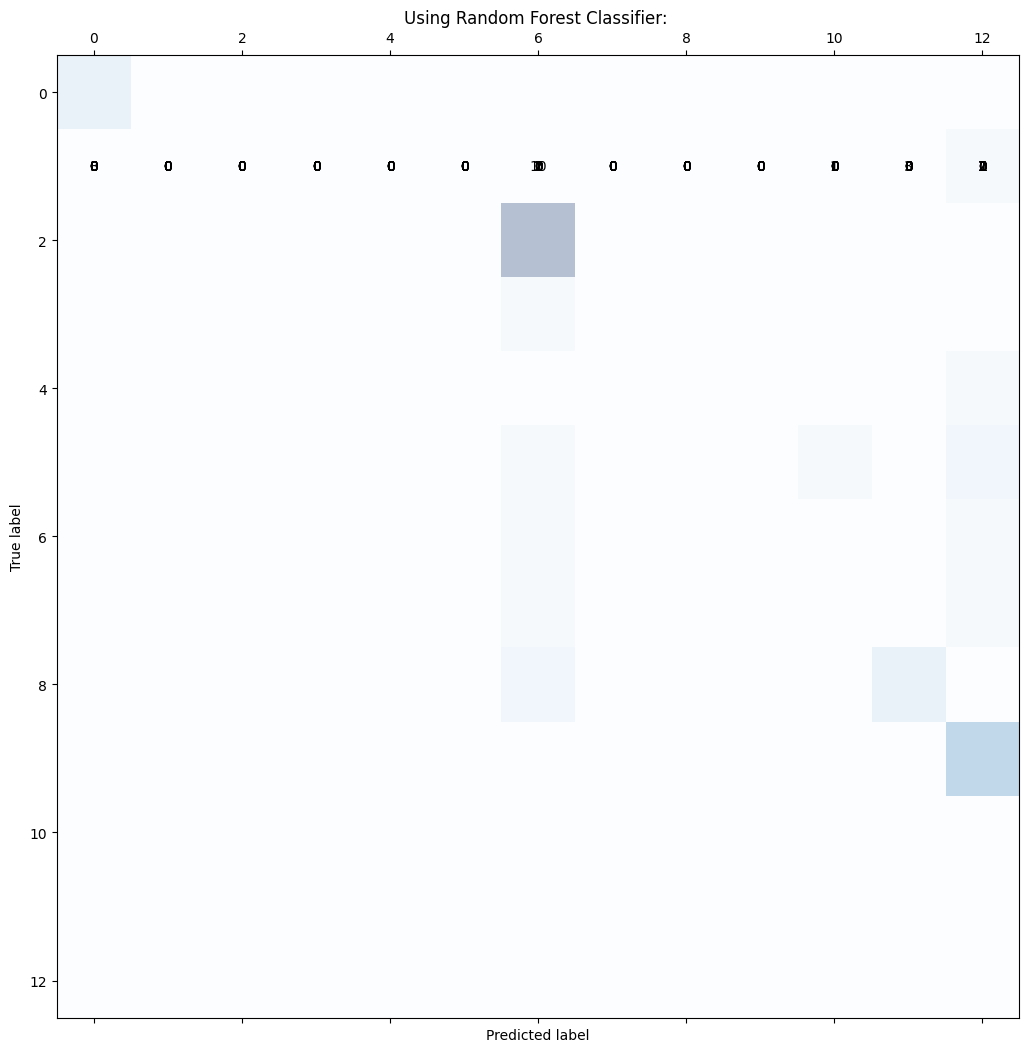

In [23]:
fig, ax = plt.subplots(figsize=(12.5,12.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.30)

for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=1, s= confmat[i,j],
            va='center', ha='center')
    plt.title('Using Random Forest Classifier: ')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

In [28]:
category_id_df = df[['Location_of_Breached_Information','Type_of_Breach']].drop_duplicates().sort_values('Type_of_Breach')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Type_of_Breach','Location_of_Breached_Information']].values)


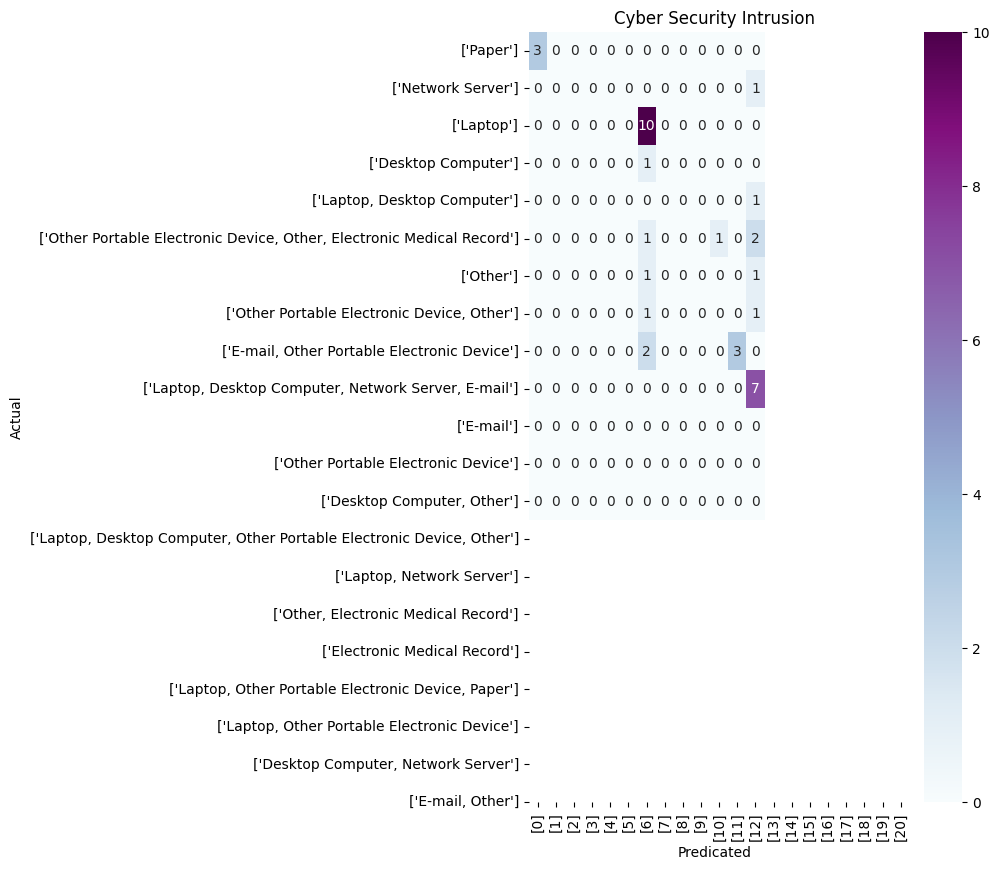

In [30]:
fig, ax = plt.subplots(figsize=(6,10))
sns.heatmap(confmat, annot= True, fmt='d', cmap='BuPu', xticklabels=category_id_df[['Type_of_Breach']].values, yticklabels=category_id_df[['Location_of_Breached_Information']].values)
plt.title('Cyber Security Intrusion')
plt.ylabel('Actual')
plt.xlabel('Predicated')
plt.show()